<div style="text-align: right">INFO 7390 Advances Data Sciences and Architecture SEC 03 Spring 2024</div>
<div style="text-align: right">Crash Course in Casuality</div>
<div style="text-align: right">Vinay Jogani, NEU ID: 002839145</div>

# <div style="text-align: center">CRASH COURSE IN CASUALITY: PART 2</div>

# Introduction

Airborne particulate matter, or PM, is a diverse mix rather than a single contaminant, consisting of various chemical substances. It is made up of a combination of solid particles and liquid droplets of varying sizes, shapes, and chemical compositions. This includes inorganic ions, metallic compounds, elemental carbon, and organic substances, among others from different sources. For regulatory purposes related to air quality, these particles are categorized based on their diameter. PM10 particles, which are 10 microns or smaller, can be inhaled and potentially cause health problems. Finer particles, known as PM2.5, are those with diameters of 2.5 microns or less and are part of the larger PM10 category.

PM can originate directly from various sources (primary particles) or develop in the air due to the chemical interactions of different gases (secondary particles), such as sulfur dioxide (SO2), nitrogen oxides (NOX), and certain organic materials, emitted by natural and anthropogenic activities. The size comparison between PM10 and PM2.5 particles is illustrated below.


**Understanding the Air Quality Index (AQI)**

**As outlined in "Air Quality Index (AQI) Basics" (https://www.airnow.gov/aqi/aqi-basics/),**

The AQI is segmented into six categories, each representing a different level of health concern and is color-coded for easy understanding. This coding aids individuals in quickly assessing the air quality and its potential health impacts in their area.

Reference: https://www.airnow.gov/aqi/aqi-basics/

**Dataset Overview:**

The dataset contains location-specific details regarding the following air pollutants:

* Nitrogen Dioxide [NO2]: A byproduct mainly from vehicle emissions and industrial activities. It can exacerbate respiratory conditions and contribute to the development of asthma.
* Ozone [O3]: Unlike stratospheric ozone, ground-level ozone is a pollutant that can cause a range of health issues, including respiratory problems and decreased lung function.
* Carbon Monoxide [CO]: A colorless, odorless gas primarily emitted from burning fossil fuels. High levels of CO can impair oxygen delivery in the body, leading to serious health issues.
* Particulate Matter [PM2.5]: Tiny particles or droplets in the air that can penetrate deep into the lungs and even enter the bloodstream, causing various health issues. They are classified as carcinogens and are a significant concern for public health.

**Dataset Features Include:**

* Country: The name of the country
* City: The name of the city
* AQI Value: The overall air quality index value for the city
* AQI Category: The health concern category according to the AQI for the city
* and specifics regarding AQI values and categories for CO, Ozone, NO2, and PM2.5.

**This study aims to delve into the causal factors behind PM2.5 levels using causal inference based on the insights drawn from the aforementioned article. It explores how PM2.5 particles are either directly emitted or formed through atmospheric chemical reactions involving various compounds such as SO2 and NOX.**

## Step 1:Importing Libraries

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('/Users/vinayjogani/Downloads/global air pollution dataset.csv')

# Data Outline

In [54]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


**1) Unique countries**

In [56]:
df['Country'].nunique()

175

**2) Unique cities**

In [57]:
df['City'].nunique()

23462

**3) No of Cities**

In [58]:
df[df['City']=='Praskoveya']

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate


There are multiple data sets available for the same cities.

**4) Displot by features**

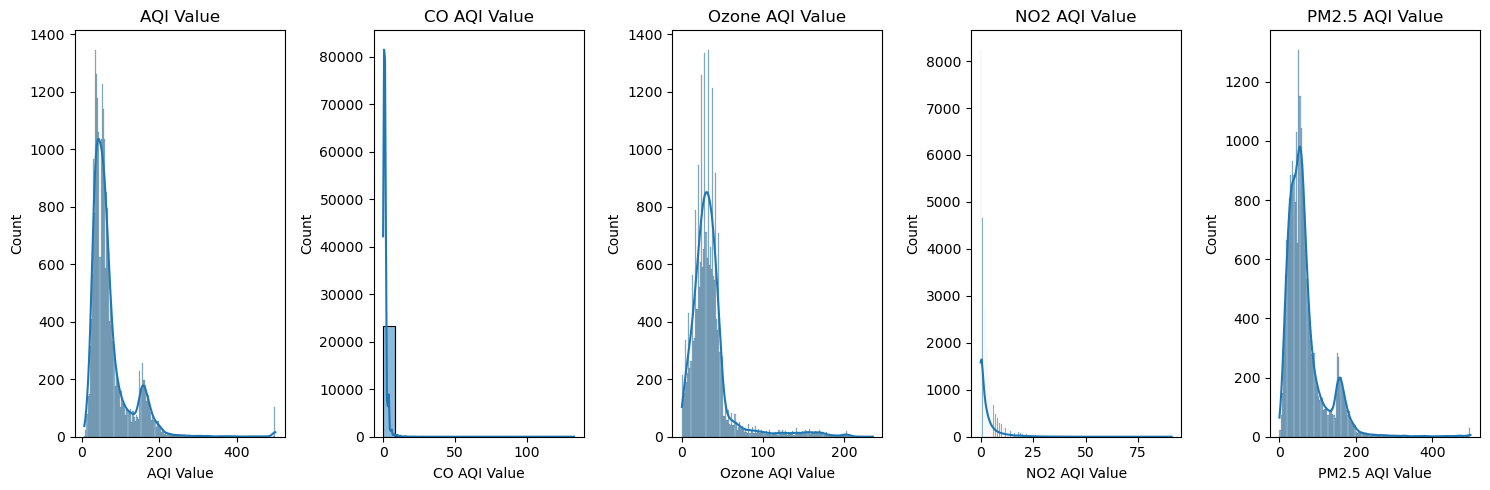

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'col' contains the column names
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15, 5))

for i in range(len(col)):
    plt.subplot(1, 5, i + 1)
    plt.title(col[i])
    sns.histplot(df, x=col[i], kde=True)  # Using histplot instead of distplot, with kernel density estimate (KDE)
plt.tight_layout()
plt.show()

**5) Boxplot by features and categories**

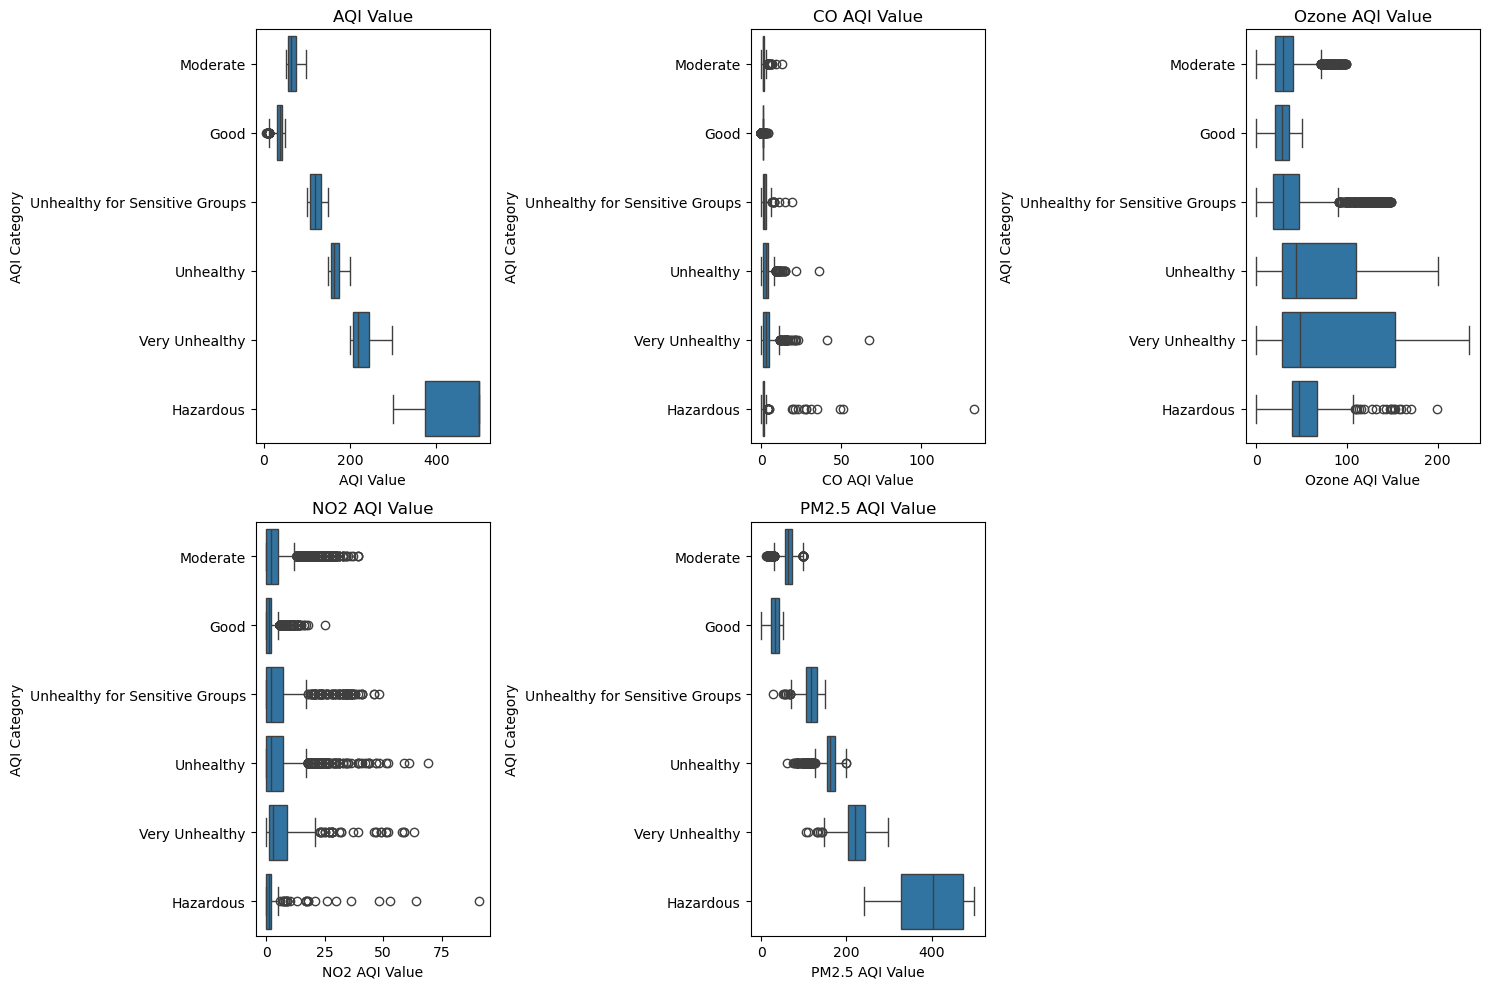

In [60]:
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,x=df[col[i]],y=df['AQI Category'])
plt.tight_layout()
plt.show()

There is a significant disparity between the categories of AQI Value and PM2.5 AQI Value.

**6) Pairplot**

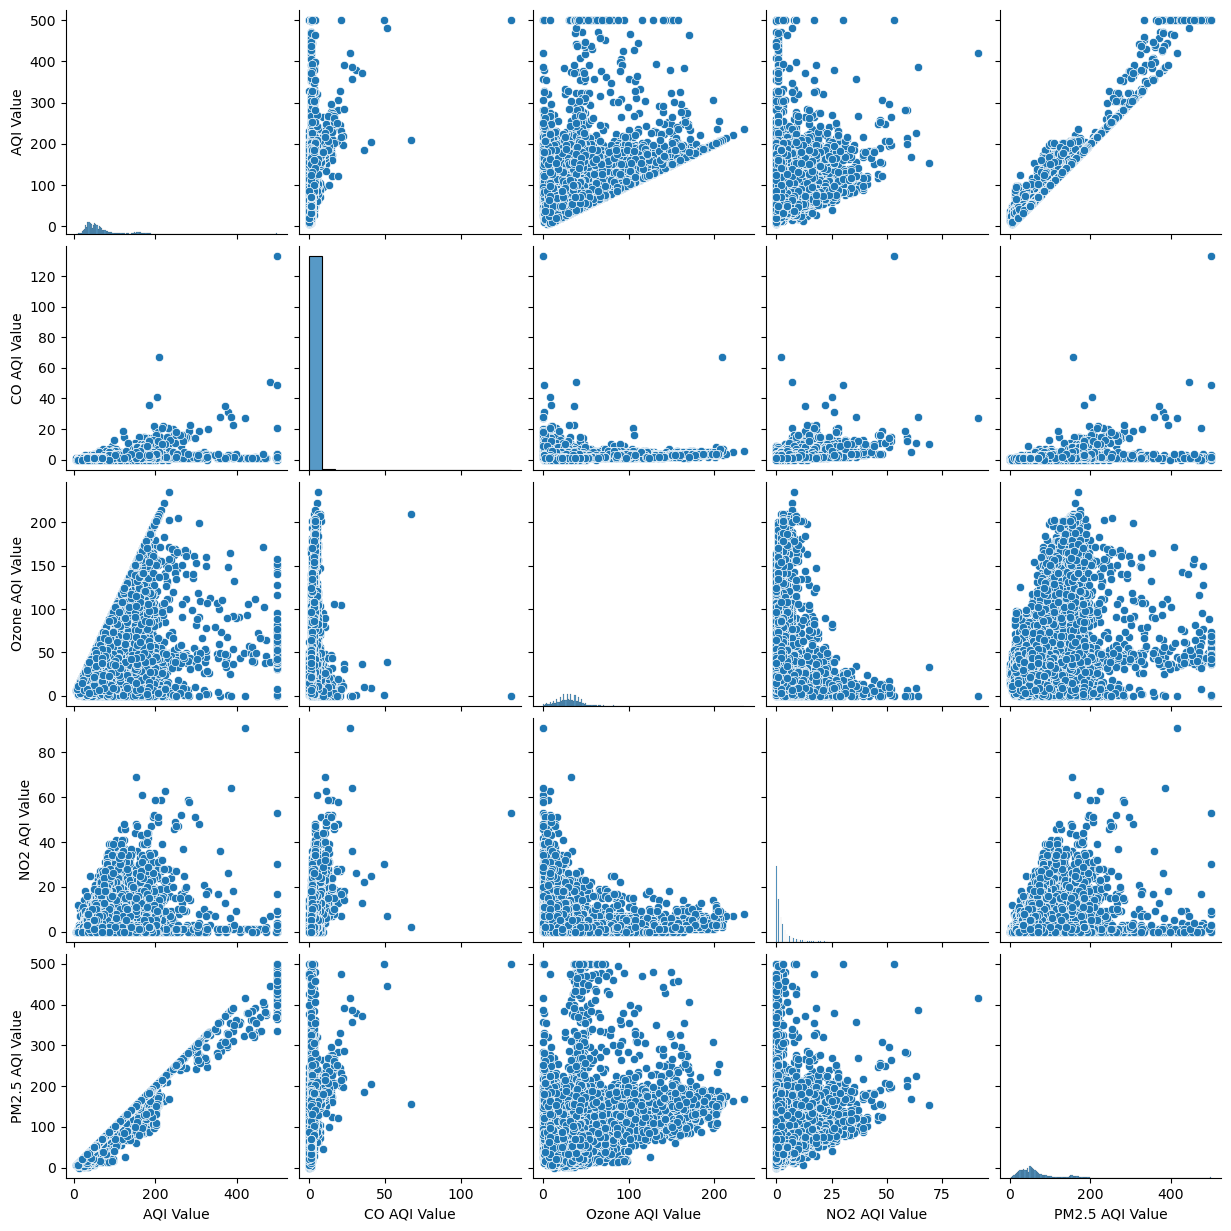

In [61]:
sns.pairplot(df);

It appears that there is a linear relationship between the AQI Value and the PM2.5 AQI Value.

**7) Correlation heatmap**

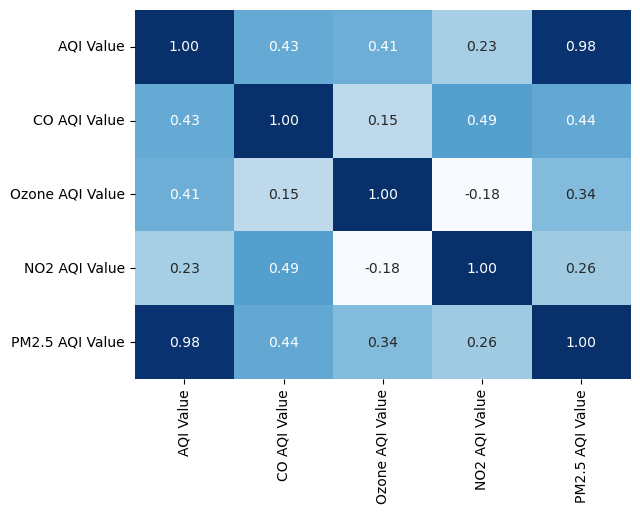

In [62]:
# Create a new DataFrame with only numeric data
numeric_df = df.select_dtypes(include=[np.number])

# Now, you can create the heatmap using only the numeric data
sns.heatmap(numeric_df.corr(), annot=True, cbar=False, cmap='Blues', fmt='.2f')
plt.show()

**Correlation between AQI Value and PM2.5 AQI Value is 98%**

**8) Lmplot between AQI Value and PM2.5 AQI Value with AQI Category**

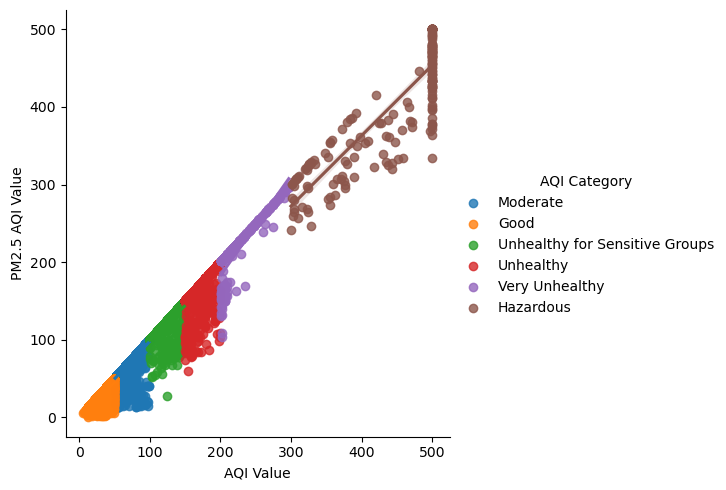

In [63]:
sns.lmplot(data=df,y='PM2.5 AQI Value',x='AQI Value',hue="AQI Category");

**9) Lmplot between CO AQI Value and NO2 AQI Value with AQI Category**

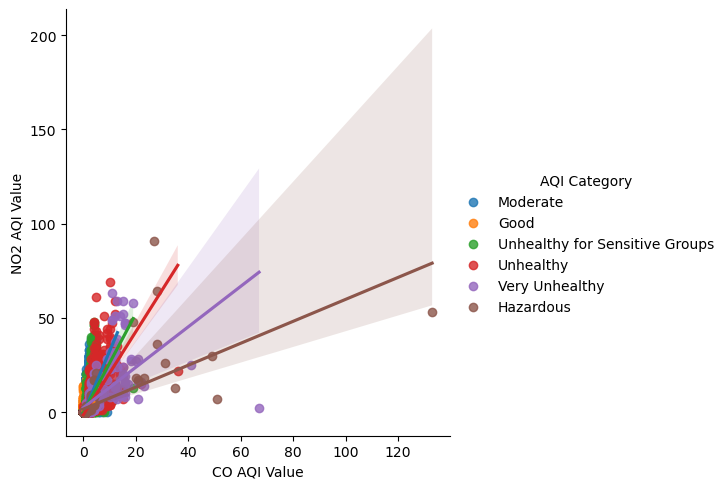

In [64]:
sns.lmplot(data=df,x='CO AQI Value',y='NO2 AQI Value',hue="AQI Category");

# Causal Inference by LinGAM

**1) Importing**

In [65]:
pip install lingam

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install category_encoders 

Note: you may need to restart the kernel to use updated packages.


In [69]:
from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

In [70]:
df1 = df.drop(["Country","City",'AQI Value',"AQI Category","CO AQI Category","Ozone AQI Category","NO2 AQI Category","PM2.5 AQI Category"], axis=1)

In [71]:
df1 = df1.dropna(how='any')

In [72]:
display(pd.DataFrame(df1.isnull().sum()).T)

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0,0,0,0


**1) Create feature and index dictionaries for readability**

In [73]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

4
{'CO AQI Value': 0, 'Ozone AQI Value': 1, 'NO2 AQI Value': 2, 'PM2.5 AQI Value': 3}


**2) Setting Prior Knowledge**

In [74]:
prior_knowledge = make_prior_knowledge(4,paths = [[df_dict['CO AQI Value'],df_dict['NO2 AQI Value']]])

**3) Modeling statistical causal inference**

In [75]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df1)

**4) Viewing causal graphs**

In [76]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

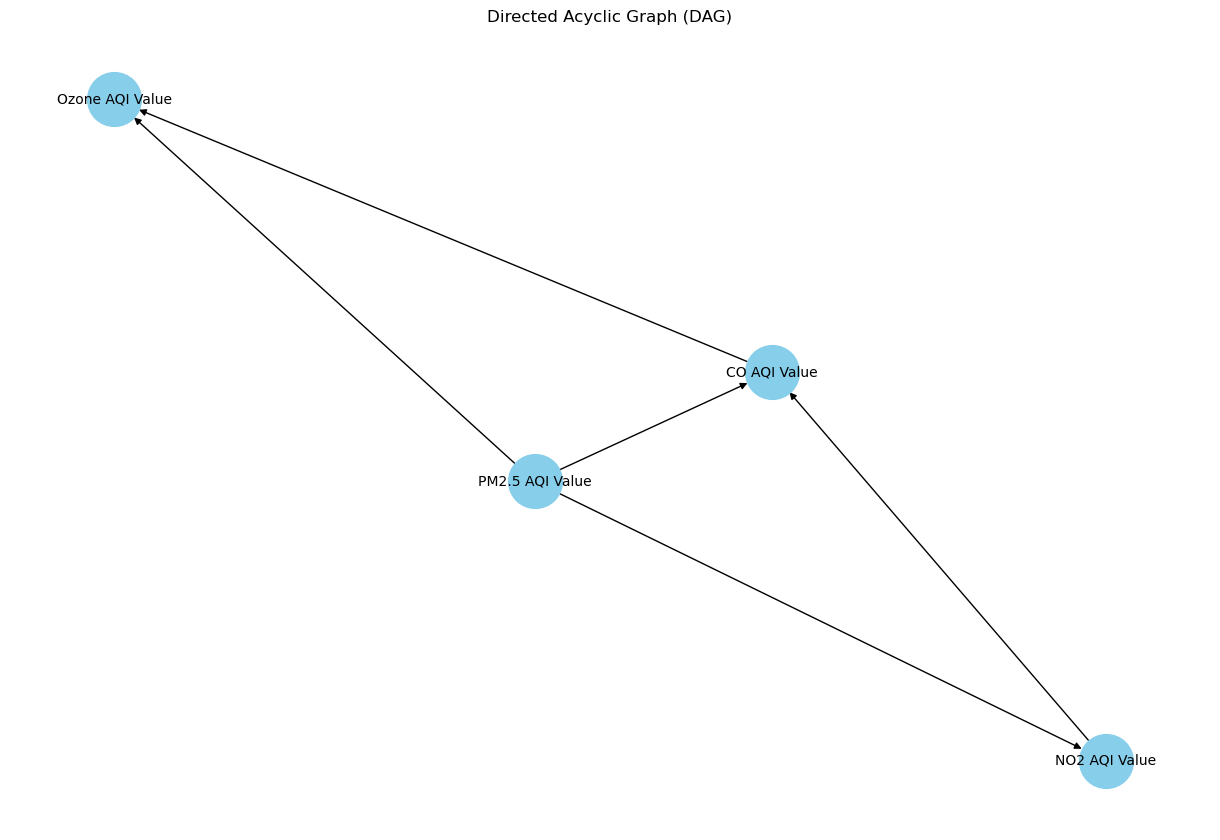

In [77]:
# Assuming 'model.adjacency_matrix_' is your adjacency matrix and 'df1.columns.to_list()' provides the labels for your nodes
adj_matrix = model.adjacency_matrix_
labels = {i: label for i, label in enumerate(df1.columns.to_list())}

# Convert the adjacency matrix to a list of edges with weights (if needed)
edges = np.argwhere(adj_matrix > 0)  # Adjust this condition based on how your adjacency matrix represents connections

# Create a new directed graph
G = nx.DiGraph()

# Add nodes with their labels
for node, label in labels.items():
    G.add_node(node, label=label)

# Add edges based on the adjacency matrix
for edge in edges:
    G.add_edge(edge[0], edge[1])

# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(12, 8))  # You can adjust the figure size as needed
nx.draw(G, pos, labels={node: G.nodes[node]['label'] for node in G.nodes}, with_labels=True, arrows=True, node_size=1500, node_color='skyblue', font_size=10)
plt.title('Directed Acyclic Graph (DAG)')
plt.show()

In [78]:
from PIL import Image

# Assuming 'model.adjacency_matrix_' is your adjacency matrix and 'df1.columns.to_list()' are your node labels
adj_matrix = model.adjacency_matrix_
labels_list = df1.columns.to_list()

# Creating a graph from the adjacency matrix
def create_and_save_dag(adj_matrix, labels_list, file_name='dag.png'):
    # Create a directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, label in enumerate(labels_list):
        G.add_node(i, label=label)

    # Add edges to the graph based on the adjacency matrix
    for i, j in zip(*np.where(adj_matrix > 0)):  # Adjust this if your adjacency convention differs
        G.add_edge(i, j)

    # Position nodes using the layout for Directed Acyclic Graphs
    pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels={i: labels_list[i] for i in range(len(labels_list))}, with_labels=True, arrows=True, node_size=2000, node_color='skyblue', font_size=12, alpha=0.7)
    plt.title('Directed Acyclic Graph (DAG)', size=15)
    plt.savefig(file_name)  # Save the figure
    plt.close()  # Close the plotting window

    # Open and display the saved image
    img = Image.open(file_name)
    img.show()

# Call the function to create and save the DAG
create_and_save_dag(adj_matrix, labels_list)

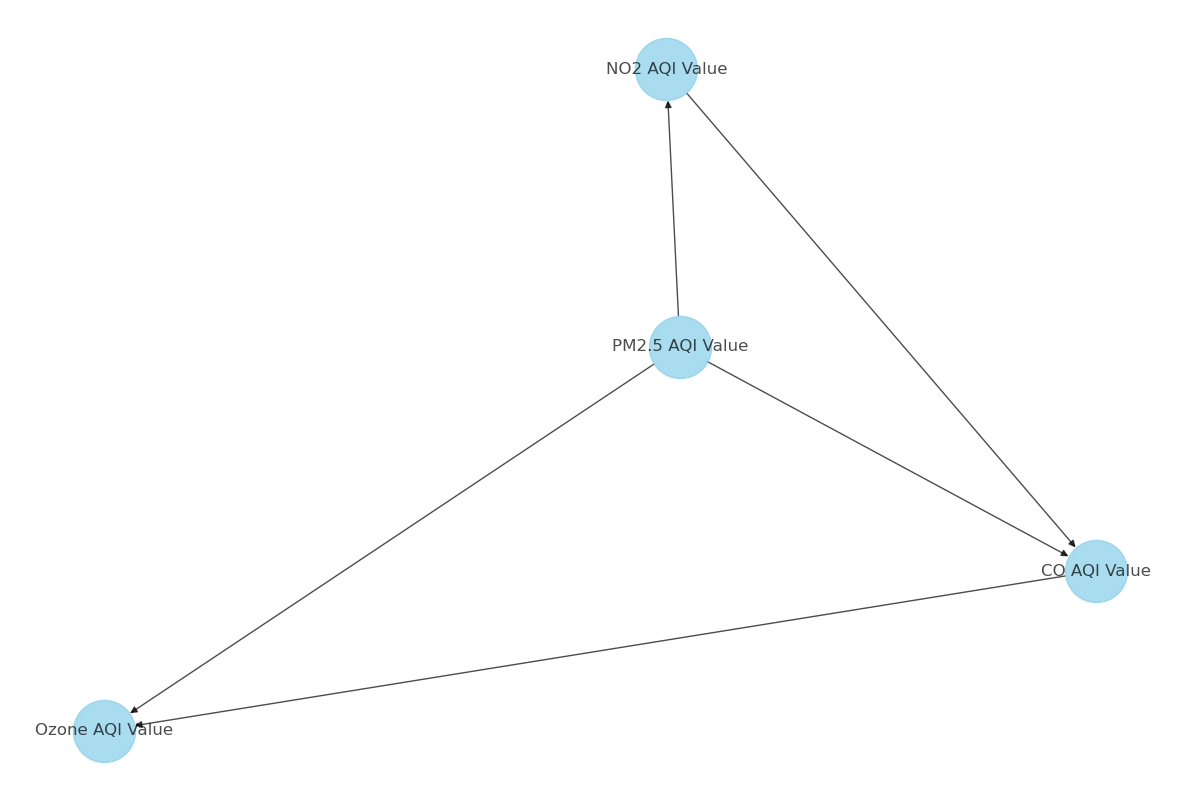

In [79]:
# Import specific classes from IPython.display to avoid naming conflicts
from IPython.display import display
from IPython.display import Image as DisplayImage

# Assuming 'model.adjacency_matrix_' is your adjacency matrix and 'df1.columns.to_list()' are your node labels
adj_matrix = model.adjacency_matrix_
labels_list = df1.columns.to_list()

# Creating a graph from the adjacency matrix
def create_and_save_dag(adj_matrix, labels_list, file_name='dag.png'):
    import networkx as nx
    import matplotlib.pyplot as plt
    
    # Create a directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, label in enumerate(labels_list):
        G.add_node(i, label=label)

    # Add edges to the graph based on the adjacency matrix
    for i, j in zip(*np.where(adj_matrix > 0)):  # Adjust this if your adjacency convention differs
        G.add_edge(i, j)

    # Position nodes using the layout for Directed Acyclic Graphs
    pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels={i: labels_list[i] for i in range(len(labels_list))}, with_labels=True, arrows=True, node_size=2000, node_color='skyblue', font_size=12, alpha=0.7)
    plt.title('Directed Acyclic Graph (DAG)', size=15)
    plt.savefig(file_name)  # Save the figure
    plt.close()  # Close the plotting window

    # Display the saved image in the notebook
    display(DisplayImage(filename=file_name))

# Call the function to create, save, and display the DAG
create_and_save_dag(adj_matrix, labels_list)

**5) Added correlation coefficient for features in the learning model**

In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df1.drop(["PM2.5 AQI Value"], axis=1), df1["PM2.5 AQI Value"])

LinearRegression()

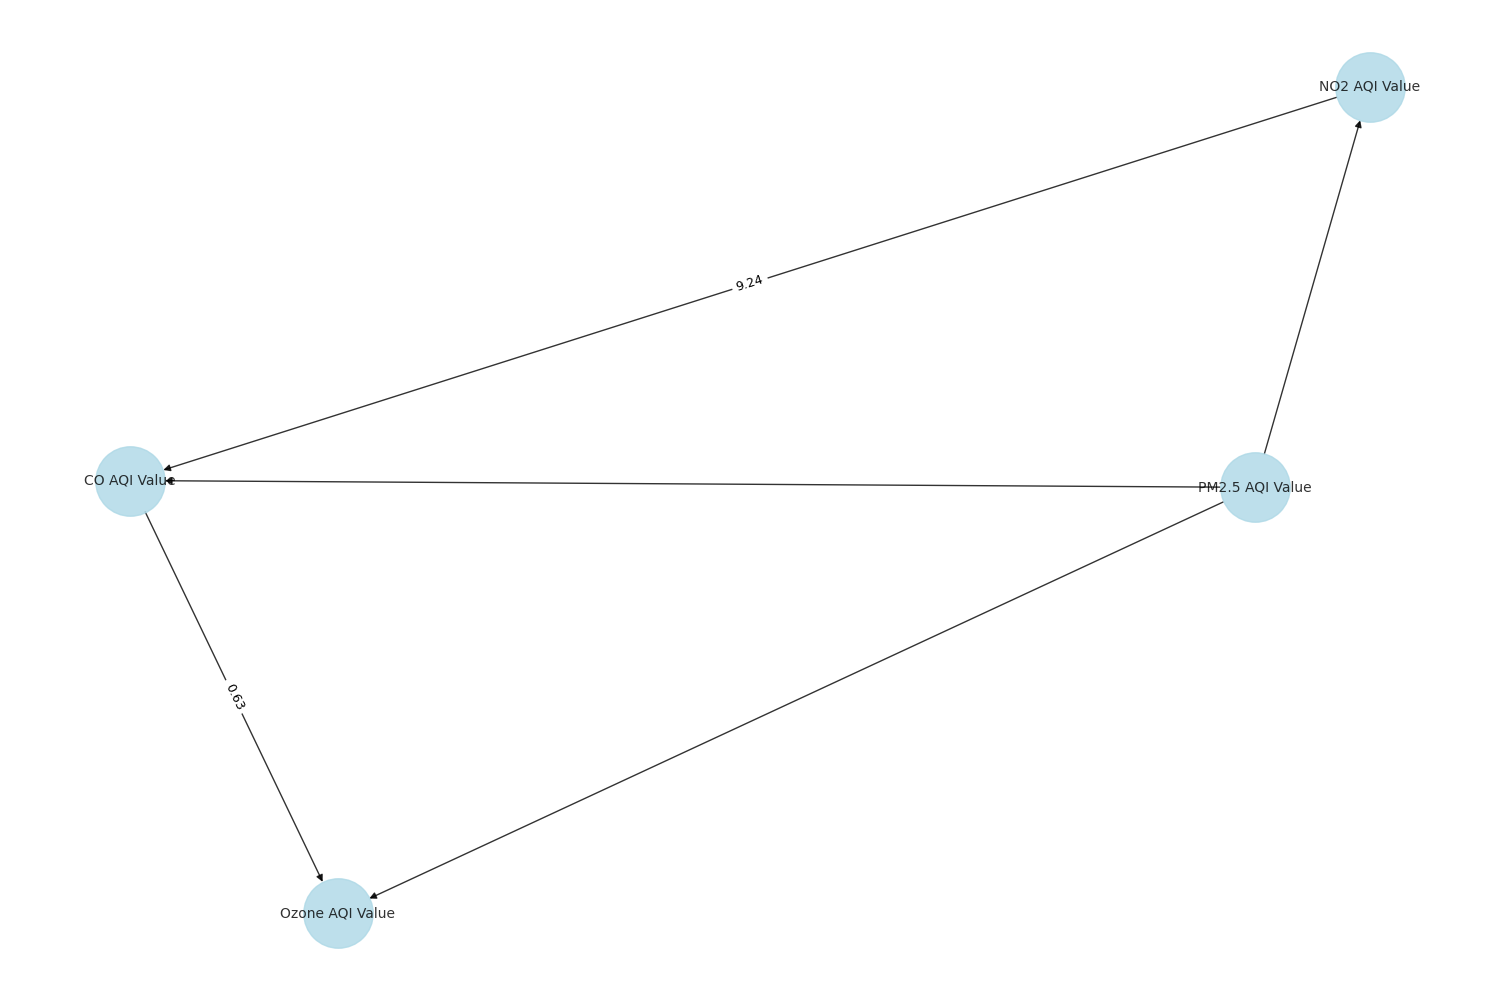

In [81]:
# Assuming 'model.adjacency_matrix_' is your adjacency matrix,
# 'df1' is your DataFrame, and 'reg.coef_' contains regression coefficients.
def create_and_save_dag(adj_matrix, df, target_label, coefs, file_name='dag.png'):
    # Extract features and labels
    features_list = df.drop([target_label], axis=1).columns.to_list()
    labels_list = features_list + [target_label]  # Assuming the target is not in features
    
    # Create a directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, label in enumerate(labels_list):
        G.add_node(i, label=label)
    
    # Add edges to the graph based on the adjacency matrix
    for i, j in zip(*np.where(adj_matrix > 0)):
        G.add_edge(i, j)
    
    # Position nodes using the layout for Directed Acyclic Graphs
    pos = nx.spring_layout(G)
    
    # Draw the graph
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, labels={i: labels_list[i] for i in range(len(labels_list))}, 
            with_labels=True, arrows=True, node_size=2500, node_color='lightblue', font_size=10, alpha=0.8)
    
    # Add regression coefficients to the edges if available
    if coefs is not None and len(features_list) == len(coefs):
        edge_labels = {(i, j): f'{coefs[j]:.2f}' for i, j in G.edges if i < len(coefs)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=9)
    
    plt.title('Directed Acyclic Graph (DAG) with Prediction Coefficients', size=15)
    plt.savefig(file_name)
    plt.close()

    # Display the saved image in the notebook
    display(DisplayImage(filename=file_name))

# Now call the function to create, save, and display the DAG
create_and_save_dag(model.adjacency_matrix_, df1, 'PM2.5 AQI Value', reg.coef_)


### References:

https://towardsdatascience.com/causality-an-introduction-f8a3f6ac4c4a#:~:text=In%20causal%20inference%2C%20the%20causal,causal%20structures%20from%20observational%20data.

https://www.youtube.com/watch?v=gRkUhg9Wb-I&ab_channel=MITOpenCourseWare

https://medium.com/causality-in-data-science/what-is-causal-machine-learning-ceb480fd2902

"Inhalable Particulate Matter and Health (PM2.5 and PM10)"(https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health)

"Air Quality Index (AQI) Basics"(https://www.airnow.gov/aqi/aqi-basics/)

"KJMAN678/casual_reasoning_lignum("https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb)



### MIT License

Copyright (c) 2024 Vinay Jogani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.